# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 74472.22 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 100378.86 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 121221.24 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 135049.75 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 143531.45 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 150108.53 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72625.49 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 104309.77 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 124790.95 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 137622.39 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 139577.09 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.42 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.50 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.24 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.44 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.24 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.34 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.02 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.84 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.30 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.44 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.38 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.40 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.34 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.51 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.39 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.66 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.61 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.94 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.03 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.48 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.81 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.74 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.04 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.28 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.17 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.27 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.66 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.35 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.60 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.08 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.65 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.45 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.07 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.92 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.83 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.86 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.69 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.55 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.99 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 36.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.87 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.26 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.84 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.58 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.84 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.25 examples/s]

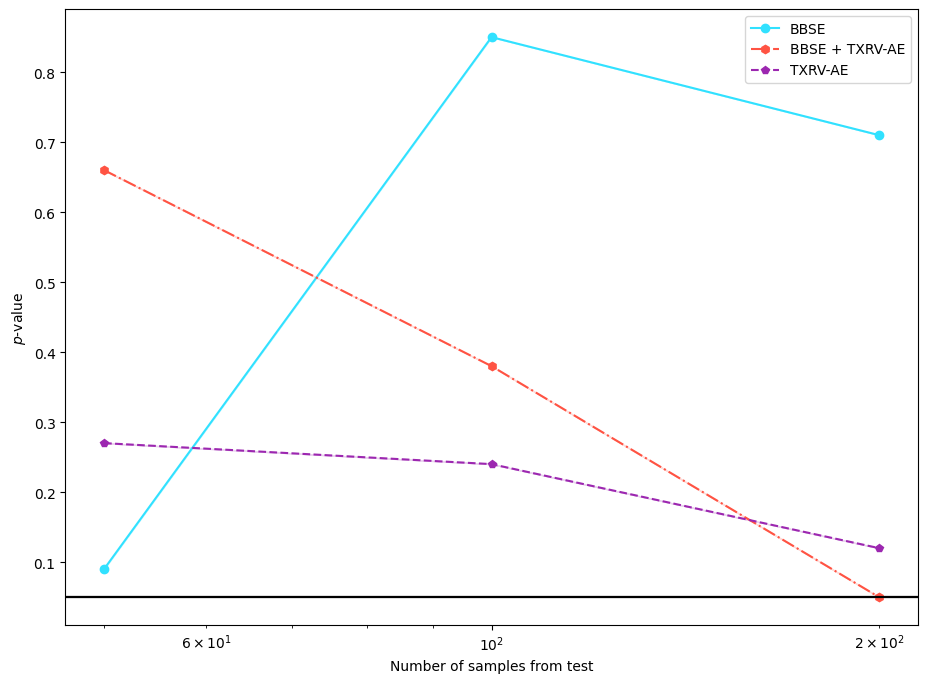

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.85 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.72 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.23 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.08 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.68 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.42 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.58 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.83 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.26 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.00 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.73 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.07 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.89 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.60 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.85 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.88 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.54 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.33 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.06 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.67 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.08 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.98 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.54 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 49.57 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.36 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.54 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.20 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.47 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.00 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.95 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.06 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.50 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.47 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.59 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.95 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.12 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.91 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.37 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.62 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.08 examples/s]

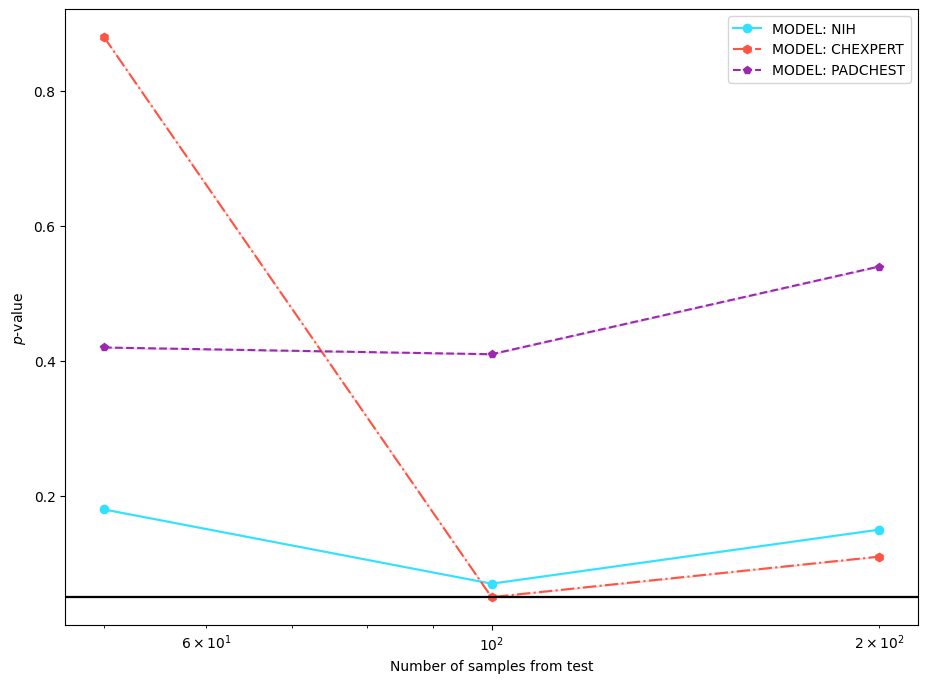

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54189.14 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 79662.31 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92602.83 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100158.56 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 105473.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111378.06 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51133.40 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76759.55 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91220.78 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99898.60 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 105527.63 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109820.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.15 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.36 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.54 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.87 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.34 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.94 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.73 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.74 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.69 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.59 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.36 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.17 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54672.40 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78075.49 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 90999.49 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97600.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98830.32 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105638.82 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53547.67 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76068.75 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 88959.06 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 98968.81 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98886.67 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107839.52 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.80 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.92 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.87 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.17 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.30 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.21 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.38 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.61 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.37 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.12 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.26 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.35 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.80 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.74 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.04 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.77 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.02 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.55 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52966.74 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73765.21 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83788.51 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97117.29 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 110639.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 120231.05 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48963.50 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71572.15 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83714.56 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95997.74 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 101754.48 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 106493.58 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.46 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.01 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.86 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.03 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.22 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.80 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.21 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.36 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.29 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.03 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.96 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.61 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.09 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.06 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.44 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 57189.71 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 81365.57 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91864.96 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 101674.61 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 104631.55 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108898.10 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54011.39 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78172.21 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 87212.76 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100404.23 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102753.72 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111886.86 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.99 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.70 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.36 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.45 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.91 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.76 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.09 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.87 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.04 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.67 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.96 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.47 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.71 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.61 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.29 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.06 examples/s]

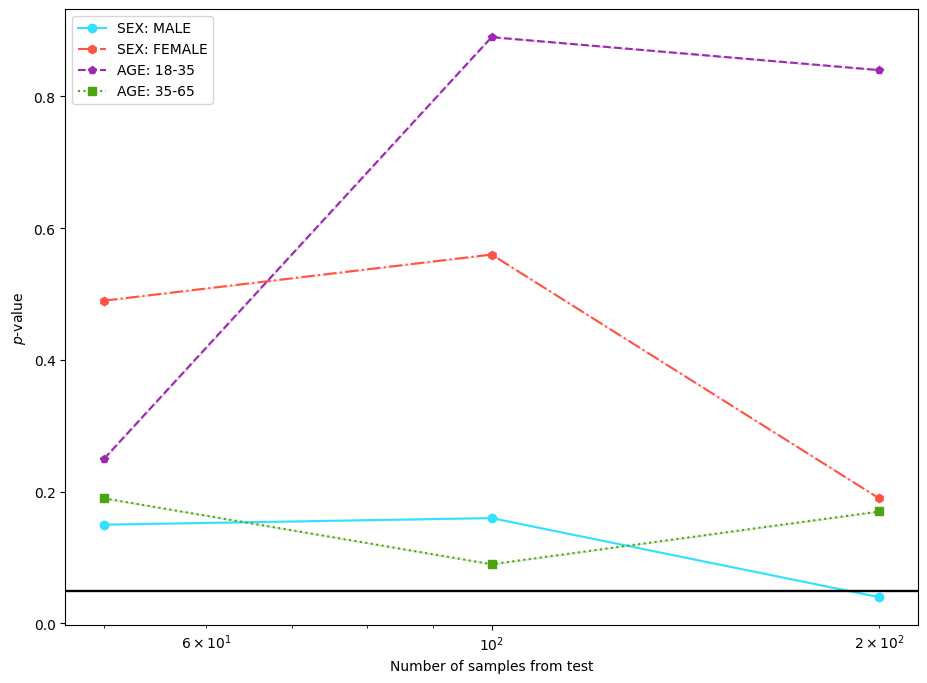

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.16 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.65 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.64 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.64 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.47 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.20 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.28 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.85 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.24 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.18 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.41 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.10 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.03 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.22 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.40 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.77 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.86 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.22 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.17 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.57 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.97 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.65 examples/s]

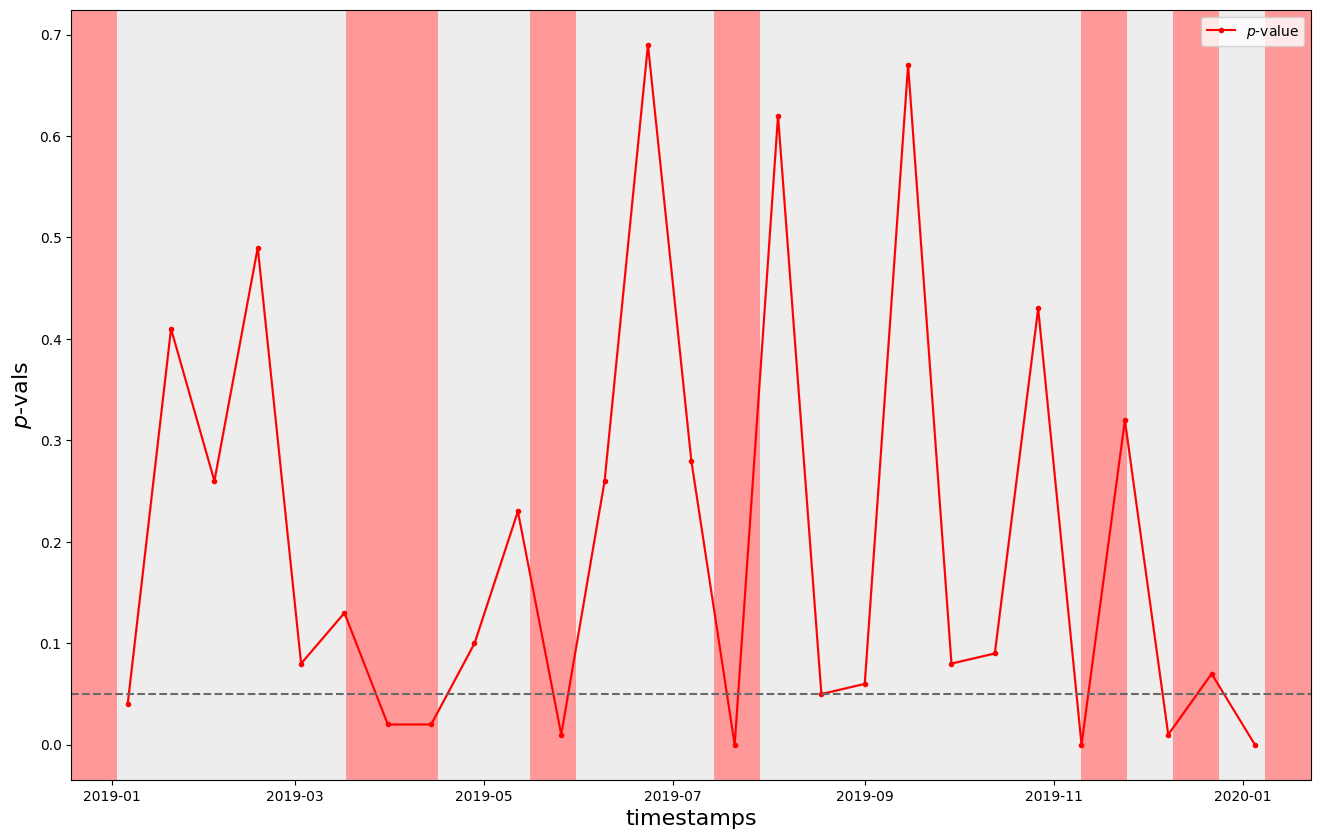

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)